In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from diffusers import DPMSolverMultistepScheduler, StableDiffusionPipeline
import torch
import gradio as gr
from gradio import Interface
from PIL import ImageOps
import torch
from diffusers import StableDiffusion3Pipeline

/home/ricardo/miniconda3/envs/mame/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricardo/miniconda3/envs/mame/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


100%|██████████| 28/28 [00:07<00:00,  3.91it/s]


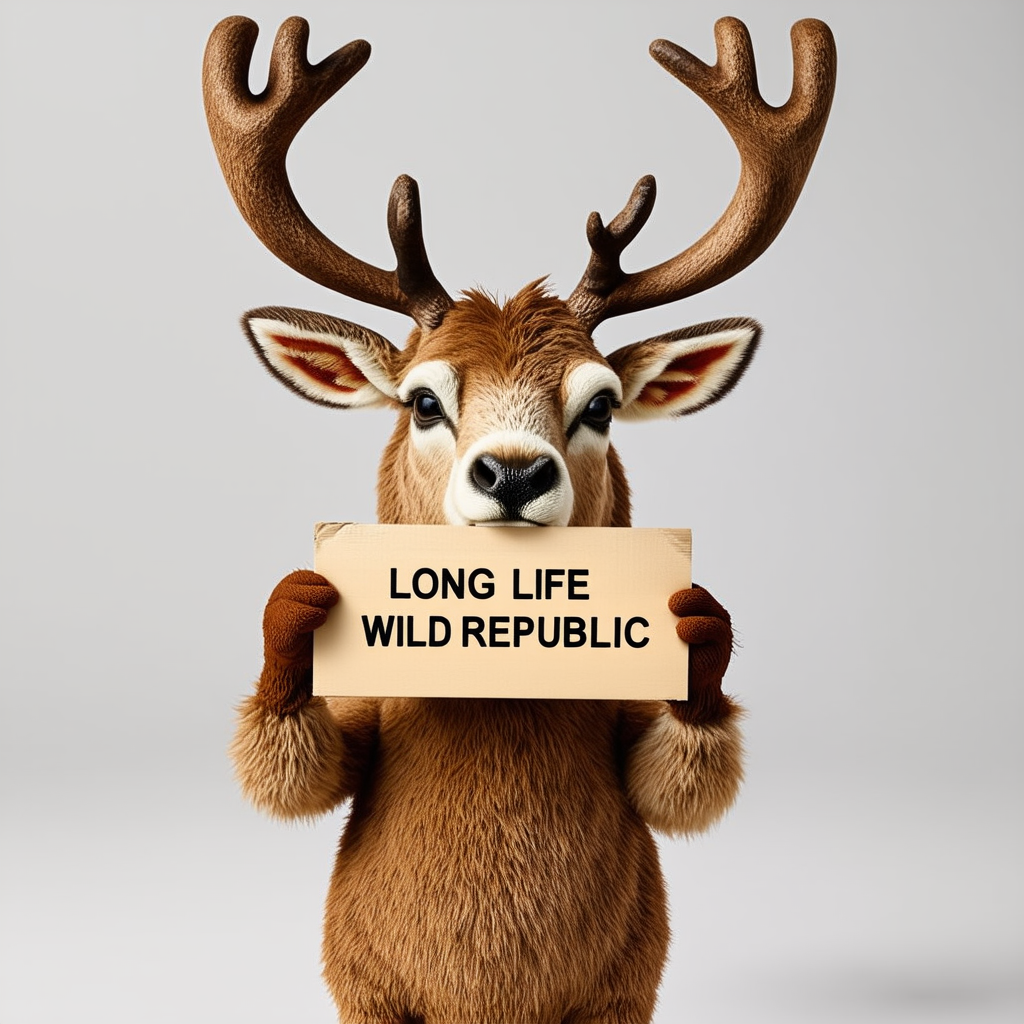

In [3]:
pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    torch_dtype=torch.float16,
    text_encoder_3=None, tokenizer_3=None,

)
pipe = pipe.to("cuda")

image = pipe(
    "A realistic reindeer holding a sign that says Long life Wild Republic",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
).images[0]
image
